### Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv('bank.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [5]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no
11161,34,technician,married,secondary,no,0,no,no,cellular,9,jul,628,1,-1,0,unknown,no


### Exploratory Data Analysis

In [6]:
df[df.isnull().any(axis = 1)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit


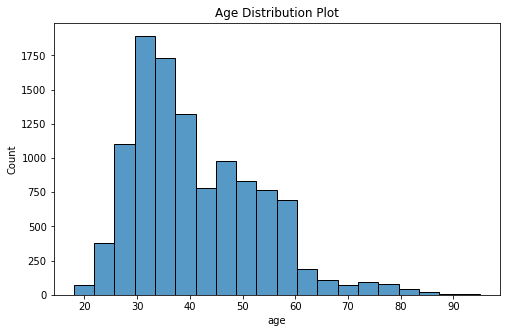

In [7]:
plt.figure(figsize = (8, 5))
plt.title('Age Distribution Plot')
sns.histplot(df, x = 'age', bins = 20)
plt.show()

In [8]:
df['job'].nunique()

12

In [9]:
df['job'].value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

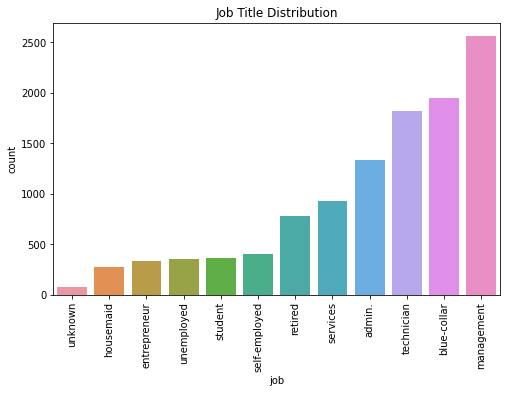

In [10]:
plt.figure(figsize = (8, 5))
plt.title('Job Title Distribution')
sns.countplot(df, x = 'job', order = df['job'].value_counts().sort_values(ascending = True).index)
plt.xticks(rotation = 90)
plt.show()

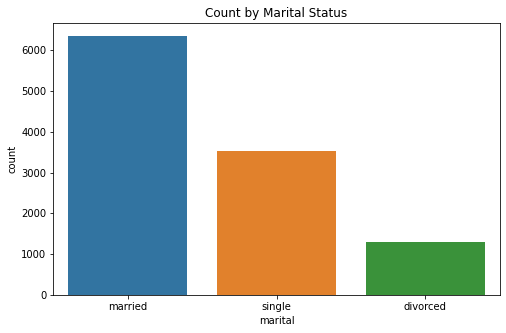

In [11]:
plt.figure(figsize = (8, 5))
plt.title('Count by Marital Status')
sns.countplot(df, x = 'marital')
plt.show()

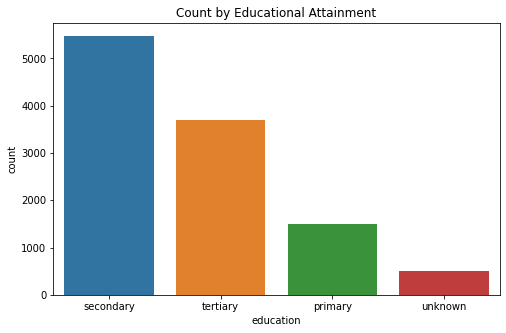

In [12]:
plt.figure(figsize = (8, 5))
plt.title('Count by Educational Attainment')
sns.countplot(df, x = 'education')
plt.show()

In [13]:
educ_unknown = df[df['education'] == 'unknown']
educ_unknown

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
44,52,management,married,unknown,no,2240,yes,no,unknown,13,may,845,1,-1,0,unknown,yes
58,40,technician,single,unknown,no,3652,yes,no,unknown,14,may,1028,2,-1,0,unknown,yes
65,44,blue-collar,married,unknown,no,146,yes,no,unknown,15,may,483,1,-1,0,unknown,yes
75,36,services,single,unknown,no,281,yes,no,unknown,16,may,515,1,-1,0,unknown,yes
108,35,blue-collar,married,unknown,no,4822,yes,no,unknown,20,may,843,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11017,42,blue-collar,married,unknown,no,1154,yes,no,cellular,16,apr,341,2,336,3,other,no
11038,36,blue-collar,married,unknown,no,1023,yes,no,cellular,4,feb,184,2,-1,0,unknown,no
11059,35,technician,single,unknown,no,726,yes,no,cellular,5,may,163,1,-1,0,unknown,no
11072,41,technician,single,unknown,no,356,yes,no,unknown,13,may,93,2,-1,0,unknown,no


In [14]:
len(educ_unknown) / len(df)

0.044526070596667265

In [15]:
df['default'].value_counts()

no     10994
yes      168
Name: default, dtype: int64

In [16]:
df['balance'].min()

-6847

In [17]:
df['balance'].max()

81204

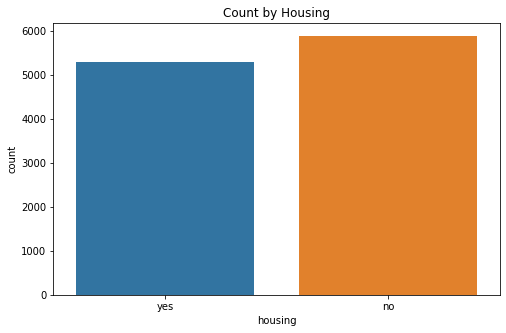

In [18]:
plt.figure(figsize = (8, 5))
plt.title('Count by Housing')
sns.countplot(df, x = 'housing')
plt.show()

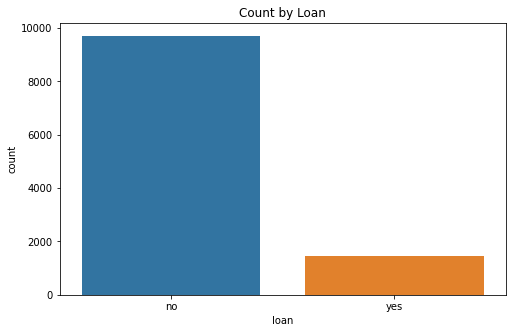

In [19]:
plt.figure(figsize = (8, 5))
plt.title('Count by Loan')
sns.countplot(df, x = 'loan')
plt.show()

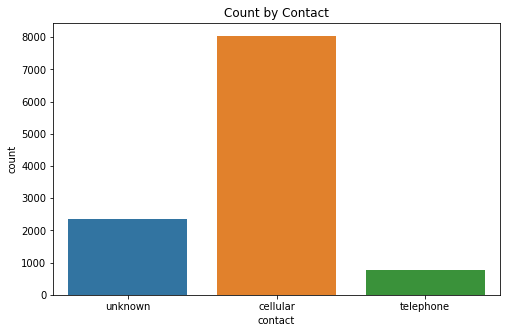

In [20]:
plt.figure(figsize = (8, 5))
plt.title('Count by Contact')
sns.countplot(df, x = 'contact')
plt.show()

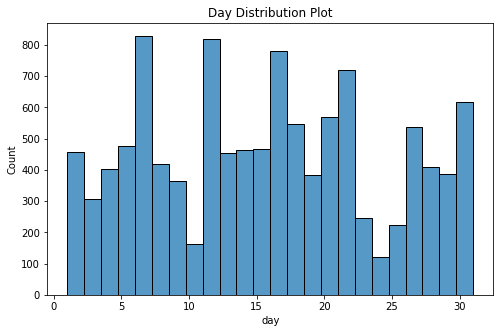

In [21]:
plt.figure(figsize = (8, 5))
plt.title('Day Distribution Plot')
sns.histplot(df, x = 'day')
plt.show()

In [22]:
df['day'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

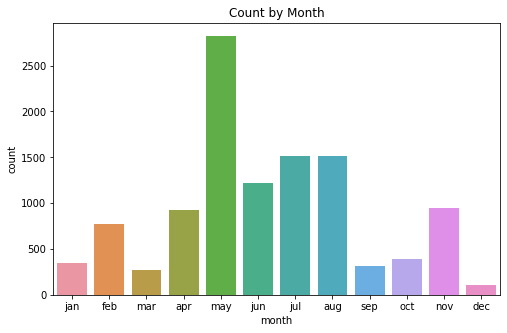

In [23]:
plt.figure(figsize = (8, 5))
plt.title('Count by Month')
sns.countplot(
    df, x = 'month', order = [
        'jan', 'feb', 'mar', 'apr',
        'may', 'jun', 'jul', 'aug',
        'sep', 'oct', 'nov', 'dec'
    ]
)
plt.show()

In [24]:
df['duration'].max()

3881

In [25]:
df['duration'].min()

2

In [26]:
df['campaign'].max()

63

In [27]:
df['campaign'].min()

1

In [28]:
df['pdays'].max()

854

In [29]:
df['pdays'].min()

-1

In [30]:
df['previous'].max()

58

In [31]:
df['previous'].min()

0

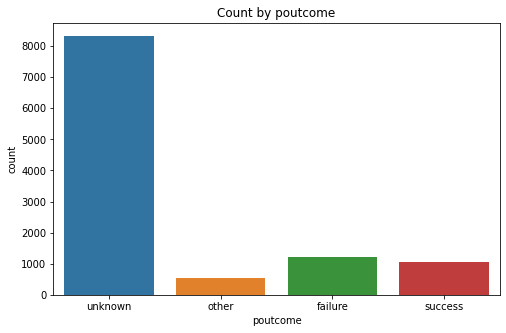

In [32]:
plt.figure(figsize = (8, 5))
plt.title('Count by poutcome')
sns.countplot(df, x = 'poutcome')
plt.show()

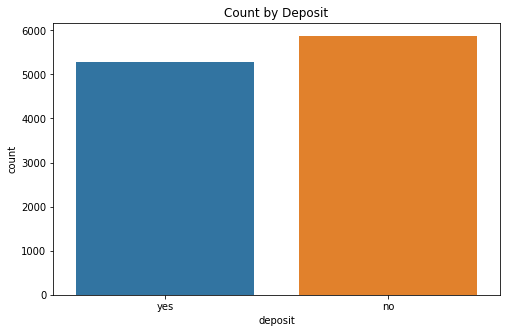

In [33]:
plt.figure(figsize = (8, 5))
plt.title('Count by Deposit')
sns.countplot(df, x = 'deposit')
plt.show()

### Preprocessing

In [34]:
len(df)

11162

In [35]:
len(educ_unknown)

497

In [36]:
df.drop(index = educ_unknown.index, inplace = True)
len(df)

10665

In [37]:
df['education'].value_counts()

secondary    5476
tertiary     3689
primary      1500
Name: education, dtype: int64

In [38]:
education_dict = {
    'primary': 0,
    'secondary': 1,
    'tertiary': 2
}

In [39]:
df['education'] = df['education'].map(education_dict)
df['education'].value_counts()

1    5476
2    3689
0    1500
Name: education, dtype: int64

In [40]:
import category_encoders as ce

In [41]:
job_basen_encoder = ce.BaseNEncoder(cols = ['job'], return_df = True, base = 4)

In [42]:
df = job_basen_encoder.fit_transform(df)
df

,age,job_0,job_1,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,married,1,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,0,1,married,1,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,0,2,married,1,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,0,3,married,1,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,0,1,married,2,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,single,0,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,0,3,married,1,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,0,2,single,1,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,0,2,married,1,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [43]:
marital_dummies = pd.get_dummies(df['marital'], prefix = 'marital', drop_first = True)
marital_dummies

,marital_married,marital_single
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
11157,0,1
11158,1,0
11159,0,1
11160,1,0


In [44]:
contact_dummies = pd.get_dummies(df['contact'], prefix = 'contact', drop_first = True)
contact_dummies

,contact_telephone,contact_unknown
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
11157,0,0
11158,0,1
11159,0,0
11160,0,0


In [45]:
poutcome_dummies = pd.get_dummies(df['poutcome'], prefix = 'poutcome', drop_first = True)
poutcome_dummies

,poutcome_other,poutcome_success,poutcome_unknown
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
11157,0,0,1
11158,0,0,1
11159,0,0,1
11160,0,0,0


In [46]:
default_dummies = pd.get_dummies(df['default'], prefix = 'default', drop_first = True)
default_dummies

,default_yes
0,0
1,0
2,0
3,0
4,0
...,...
11157,0
11158,0
11159,0
11160,0


In [47]:
housing_dummies = pd.get_dummies(df['housing'], prefix = 'housing', drop_first = True)
housing_dummies

,housing_yes
0,1
1,0
2,1
3,1
4,0
...,...
11157,1
11158,0
11159,0
11160,0


In [48]:
loan_dummies = pd.get_dummies(df['loan'], prefix = 'loan', drop_first = True)
loan_dummies

,loan_yes
0,0
1,0
2,0
3,0
4,0
...,...
11157,0
11158,0
11159,0
11160,1


In [49]:
month_dict = {
    'jan': 0,
    'feb': 1,
    'mar': 2,
    'apr': 3,
    'may': 4,
    'jun': 5,
    'jul': 6,
    'aug': 7,
    'sep': 8,
    'oct': 9,
    'nov': 10,
    'dec': 11
}

In [50]:
df['month'].value_counts()

may    2709
aug    1461
jul    1436
jun    1171
nov     912
apr     875
feb     744
oct     364
jan     322
sep     299
mar     269
dec     103
Name: month, dtype: int64

In [51]:
df['month'] = df['month'].map(month_dict)
df['month'].value_counts()

4     2709
7     1461
6     1436
5     1171
10     912
3      875
1      744
9      364
0      322
8      299
2      269
11     103
Name: month, dtype: int64

In [52]:
df['default'].value_counts()

no     10506
yes      159
Name: default, dtype: int64

In [53]:
df['default'] = default_dummies
df['default'].value_counts()

0    10506
1      159
Name: default, dtype: int64

In [54]:
df['housing'].value_counts()

no     5558
yes    5107
Name: housing, dtype: int64

In [55]:
df['housing'] = housing_dummies
df['housing'].value_counts()

0    5558
1    5107
Name: housing, dtype: int64

In [56]:
df['loan'].value_counts()

no     9231
yes    1434
Name: loan, dtype: int64

In [57]:
df['loan'] = loan_dummies
df['loan'].value_counts()

0    9231
1    1434
Name: loan, dtype: int64

In [58]:
df.columns

Index(['age', 'job_0', 'job_1', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'deposit'],
      dtype='object')

In [59]:
df.drop(['marital', 'contact', 'poutcome'], axis = 1, inplace = True)
df.columns

Index(['age', 'job_0', 'job_1', 'education', 'default', 'balance', 'housing',
       'loan', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'deposit'],
      dtype='object')

In [60]:
df.head()

,age,job_0,job_1,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,deposit
0,59,0,1,1,0,2343,1,0,5,4,1042,1,-1,0,yes
1,56,0,1,1,0,45,0,0,5,4,1467,1,-1,0,yes
2,41,0,2,1,0,1270,1,0,5,4,1389,1,-1,0,yes
3,55,0,3,1,0,2476,1,0,5,4,579,1,-1,0,yes
4,54,0,1,2,0,184,0,0,5,4,673,2,-1,0,yes


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10665 entries, 0 to 11161
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        10665 non-null  int64 
 1   job_0      10665 non-null  int64 
 2   job_1      10665 non-null  int64 
 3   education  10665 non-null  int64 
 4   default    10665 non-null  uint8 
 5   balance    10665 non-null  int64 
 6   housing    10665 non-null  uint8 
 7   loan       10665 non-null  uint8 
 8   day        10665 non-null  int64 
 9   month      10665 non-null  int64 
 10  duration   10665 non-null  int64 
 11  campaign   10665 non-null  int64 
 12  pdays      10665 non-null  int64 
 13  previous   10665 non-null  int64 
 14  deposit    10665 non-null  object
dtypes: int64(11), object(1), uint8(3)
memory usage: 1.1+ MB


In [62]:
df = pd.concat([df, marital_dummies, contact_dummies, poutcome_dummies], axis = 1)
df

,age,job_0,job_1,education,default,balance,housing,loan,day,month,...,pdays,previous,deposit,marital_married,marital_single,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,59,0,1,1,0,2343,1,0,5,4,...,-1,0,yes,1,0,0,1,0,0,1
1,56,0,1,1,0,45,0,0,5,4,...,-1,0,yes,1,0,0,1,0,0,1
2,41,0,2,1,0,1270,1,0,5,4,...,-1,0,yes,1,0,0,1,0,0,1
3,55,0,3,1,0,2476,1,0,5,4,...,-1,0,yes,1,0,0,1,0,0,1
4,54,0,1,2,0,184,0,0,5,4,...,-1,0,yes,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,0,1,1,0,20,3,...,-1,0,no,0,1,0,0,0,0,1
11158,39,0,3,1,0,733,0,0,16,5,...,-1,0,no,1,0,0,1,0,0,1
11159,32,0,2,1,0,29,0,0,19,7,...,-1,0,no,0,1,0,0,0,0,1
11160,43,0,2,1,0,0,0,1,8,4,...,172,5,no,1,0,0,0,0,0,0


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10665 entries, 0 to 11161
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                10665 non-null  int64 
 1   job_0              10665 non-null  int64 
 2   job_1              10665 non-null  int64 
 3   education          10665 non-null  int64 
 4   default            10665 non-null  uint8 
 5   balance            10665 non-null  int64 
 6   housing            10665 non-null  uint8 
 7   loan               10665 non-null  uint8 
 8   day                10665 non-null  int64 
 9   month              10665 non-null  int64 
 10  duration           10665 non-null  int64 
 11  campaign           10665 non-null  int64 
 12  pdays              10665 non-null  int64 
 13  previous           10665 non-null  int64 
 14  deposit            10665 non-null  object
 15  marital_married    10665 non-null  uint8 
 16  marital_single     10665 non-null  uint8

### Train-Test Split and Scaling

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X = df.drop('deposit', axis = 1)
y = df['deposit']

In [66]:
from sklearn.preprocessing import MaxAbsScaler

In [67]:
X = MaxAbsScaler().fit_transform(X)

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 50)

### Training and Evaluation

In [69]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [70]:
def train_and_evaluate(models: list, X_train, X_test, y_train, y_test):
    for model in models:
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        
        print(f'Model: {type(model).__name__}')
        print(f'Accuracy Score: {accuracy_score(y_test, predictions):.2f}%')
        print(f'Confusion Matrix: \n{confusion_matrix(y_test, predictions)}\n')
        print(f'Classification Report: {classification_report(y_test, predictions)}\n\n\n')

In [71]:
train_and_evaluate(
    [
        DecisionTreeClassifier(),
        RandomForestClassifier(),
        SVC(),
        GaussianProcessClassifier(),
        LogisticRegression(),
    ],
    X_train, X_test, y_train, y_test
)

Model: DecisionTreeClassifier
Accuracy Score: 0.79%
Confusion Matrix: 
[[1373  323]
 [ 346 1158]]

Classification Report:               precision    recall  f1-score   support

          no       0.80      0.81      0.80      1696
         yes       0.78      0.77      0.78      1504

    accuracy                           0.79      3200
   macro avg       0.79      0.79      0.79      3200
weighted avg       0.79      0.79      0.79      3200




Model: RandomForestClassifier
Accuracy Score: 0.84%
Confusion Matrix: 
[[1393  303]
 [ 208 1296]]

Classification Report:               precision    recall  f1-score   support

          no       0.87      0.82      0.85      1696
         yes       0.81      0.86      0.84      1504

    accuracy                           0.84      3200
   macro avg       0.84      0.84      0.84      3200
weighted avg       0.84      0.84      0.84      3200




Model: SVC
Accuracy Score: 0.80%
Confusion Matrix: 
[[1405  291]
 [ 336 1168]]

Classification R